In [7]:
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('k_wordcloud.csv')
df

,date,title,source,contents,link
0,7시간 전,"클린스만 ""경기만 보면 최고"" 수석코치 ""손흥민·이강인이 박살내""",중앙일보언론사 선정,위르겐 클린스만(감독)의 적반하장이 이어지고 있다. 함께 한 코칭스태프도 축구대표팀...,https://www.joongang.co.kr/article/25229358
1,11시간 전,"경질된 클린스만, 독일 언론에 “경기 면에선 최고였다”",조선일보언론사 선정,아시안컵 4강 탈락 이후 잇단 논란 끝에 결국 한국 축구 국가대표팀 감독에서 해임된...,https://www.chosun.com/international/internati...
2,6시간 전,이 돈 다 누가 대나…70억 챙겨 떠나는 클린스만 축구대표팀 감독 [뉴스속인물...,데일리안언론사 선정,위르겐 클린스만 전 한국 축구대표팀 감독이 결국 부임 11개월 만에 지휘봉을 내려놨...,https://www.dailian.co.kr/news/view/1329489/?s...
3,7시간 전,뮌헨이 축협의 구세주가 될까? 클린스만이 새 감독 후보로 거론,스포츠경향,최근 대한축구협회가 경질한 위르겐 클린스만 축구대표팀 감독(60)이 독일 명문 바이...,http://sports.khan.co.kr/news/sk_index.html?ar...
4,4시간 전,"70억 챙긴 클린스만, SNS서 한국축구 '손절'",MBN언론사 선정,대한민국 축구 국가대표팀 감독에서 경질된 위르겐 클린스만이 SNS에서 한국 축구 관...,http://mbn.mk.co.kr/pages/news/newsView.php?ca...
...,...,...,...,...,...
85,12시간 전,3월 '정식' 감독 선임설… 또 클린스만 실수 반복하려고 [단상들],스포츠한국,차두리 코치가 힘들다면 벤투호와 클린스만호에 거쳐 5년가량 대표팀 코치를 한 마이클...,https://sports.hankooki.com/news/articleView.h...
86,8시간 전,"클린스만 경질 → 日 모리야스 감독 ""해임된 것이냐"" 역질문.. ""결과 때문 만...",스포츠조선,일본 축구 대표팀 모리야스 하지메 감독이 '클린스만 경질' 소식을 듣고 소감을 담담...,http://sports.chosun.com/news/ntype.htm?id=202...
87,7시간 전,헤어초크 전 코치 “정몽규 축협 회장 압박에 우리 해임…안타까워”,서울신문언론사 선정,위르겐 클린스만(59)과 함께 한국 축구 국가대표팀에서 해임된 안드레아스 헤어초크(...,https://www.seoul.co.kr/news/newsView.php?id=2...
88,18시간 전,"“감독으로서 특성이 없고, 앞으로도 그럴 것이다” 獨 매체도 인정한 클린스...",스포탈코리아,클린스만은 앞으로도 이럴 사람이다. 독일 매체 ‘프랑크푸르터 룬트샤우’는 17일(한...,https://www.sportalkorea.com/news/view.php?gis...


In [9]:
df["contents"] = df["contents"].str.replace('[^가-힣]', ' ', regex = True)
df["contents"]

0     위르겐 클린스만 감독 의 적반하장이 이어지고 있다  함께 한 코칭스태프도 축구대표팀...
1     아시안컵  강 탈락 이후 잇단 논란 끝에 결국 한국 축구 국가대표팀 감독에서 해임된...
2     위르겐 클린스만 전 한국 축구대표팀 감독이 결국 부임   개월 만에 지휘봉을 내려놨...
3     최근 대한축구협회가 경질한 위르겐 클린스만 축구대표팀 감독    이 독일 명문 바이...
4     대한민국 축구 국가대표팀 감독에서 경질된 위르겐 클린스만이    에서 한국 축구 관...
                            ...                        
85    차두리 코치가 힘들다면 벤투호와 클린스만호에 거쳐  년가량 대표팀 코치를 한 마이클...
86    일본 축구 대표팀 모리야스 하지메 감독이  클린스만 경질  소식을 듣고 소감을 담담...
87    위르겐 클린스만    과 함께 한국 축구 국가대표팀에서 해임된 안드레아스 헤어초크 ...
88    클린스만은 앞으로도 이럴 사람이다  독일 매체  프랑크푸르터 룬트샤우 는   일 한...
89    위르겐 클린스만 감독이 특유의 원격근무 형태 덕분에 뜻밖의 절세 효과를 볼 것으로 ...
Name: contents, Length: 90, dtype: object

In [10]:
import konlpy
kkma = konlpy.tag.Kkma() 

nouns = df['contents'].apply(kkma.nouns)
nouns

0     [위, 위르겐, 르, 겐, 클린, 클린스만, 스만, 감독, 적반하장, 코칭스태프, ...
1     [아시안, 아시안컵, 컵, 강, 탈락, 이후, 논란, 끝, 결국, 한국, 축구, 국...
2     [위, 위르겐, 르, 겐, 클린, 클린스만, 스만, 전, 한국, 축구, 축구대표팀,...
3     [최근, 대한, 대한축구협회, 축구, 협회, 경질, 위, 위르겐, 르, 겐, 클린,...
4     [대한, 대한민국, 민국, 축구, 국가, 국가대표팀, 대표팀, 감독, 경질, 위, ...
                            ...                        
85    [차, 차두리, 두리, 코치, 투호, 클린스만호, 년, 년가량, 가량, 대표팀, 마...
86    [일본, 축구, 대표팀, 모리, 하지메, 감독, 클린, 클린스만, 스만, 경질, 소...
87    [위, 위르겐, 르, 겐, 클린, 클린스만, 스만, 과, 한국, 축구, 국가, 국가...
88    [클린스만, 앞, 사람, 독일, 매체, 프랑크, 프랑크푸르터, 푸르터, 룬트샤, 룬...
89    [위, 위르겐, 르, 겐, 클린, 클린스만, 스만, 감독, 특유, 원격, 원격근무,...
Name: contents, Length: 90, dtype: object

In [11]:
nouns = nouns.explode()
nouns

0        위
0      위르겐
0        르
0        겐
0       클린
      ... 
89      출국
89       그
89      열린
89    축구협회
89      협회
Name: contents, Length: 3530, dtype: object

In [12]:
df_word = pd.DataFrame({'word' : nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word

,word,count
0,위르겐,3.0
0,클린,2.0
0,클린스만,4.0
0,스만,2.0
0,감독,2.0
...,...,...
89,미국,2.0
89,출국,2.0
89,열린,2.0
89,축구협회,4.0


In [13]:
df_word = df_word.groupby('word', as_index=False).count().sort_values('count', ascending=False)
df_word

,word,count
635,클린스만,107
362,스만,87
634,클린,87
6,감독,87
603,축구,77
...,...,...
287,비셀,1
286,비난,1
285,비교,1
283,비겁,1


In [14]:
df_word = df_word.iloc[3:, :]
df_word.head(5)

,word,count
6,감독,87
603,축구,77
451,위르겐,71
160,대표팀,70
44,경질,65


In [24]:
dic_word = df_word.set_index('word').to_dict()['count']

del dic_word['감독']
del dic_word['위르겐']
del dic_word['축구']
del dic_word['대표팀']
del dic_word['한국']

dic_word

{'경질': 65,
 '협회': 45,
 '대한': 38,
 '대한축구협회': 33,
 '아시안컵': 31,
 '독일': 30,
 '아시안': 30,
 '몽규': 28,
 '정몽규': 26,
 '축구대표팀': 26,
 '회의': 23,
 '국가': 23,
 '선수': 20,
 '회장': 19,
 '매체': 17,
 '국가대표팀': 16,
 '축구협회': 16,
 '회관': 16,
 '축구회관': 16,
 '임원': 15,
 '서울': 15,
 '전력': 14,
 '시간': 13,
 '선임': 13,
 '종로': 12,
 '종로구': 12,
 '협회장': 12,
 '강화': 12,
 '발표': 12,
 '이후': 11,
 '지난해': 11,
 '대표': 11,
 '기자': 11,
 '사령탑': 10,
 '임원회의': 9,
 '슈피겔': 9,
 '부임': 9,
 '손흥민': 9,
 '인터뷰': 9,
 '스포츠': 9,
 '위약금': 9,
 '코치': 9,
 '결정': 9,
 '경기': 9,
 '결과': 8,
 '소식': 8,
 '최근': 8,
 '결국': 8,
 '미국': 8,
 '위원회': 8,
 '자신': 8,
 '해임': 8,
 '탈락': 8,
 '수석코치': 7,
 '국가대표': 7,
 '회견': 7,
 '논란': 7,
 '수석': 7,
 '부진': 7,
 '책임': 7,
 '역대': 7,
 '한국시간': 7,
 '헤어초크': 7,
 '보도': 7,
 '비판': 7,
 '관련': 6,
 '긴급': 6,
 '모습': 6,
 '아시아': 6,
 '전날': 6,
 '월드컵': 6,
 '기자회견': 6,
 '성공적': 6,
 '카타르': 6,
 '최고': 6,
 '준결승': 6,
 '경기력': 6,
 '남자': 6,
 '이번': 6,
 '전력강화위원회': 6,
 '지휘봉': 6,
 '축구협회장': 6,
 '연맹': 6,
 '이날': 5,
 '사태': 5,
 '기간': 5,
 '강인': 5,
 '년도': 5,
 '가운데': 5,
 '자리': 5,
 '계정': 5,


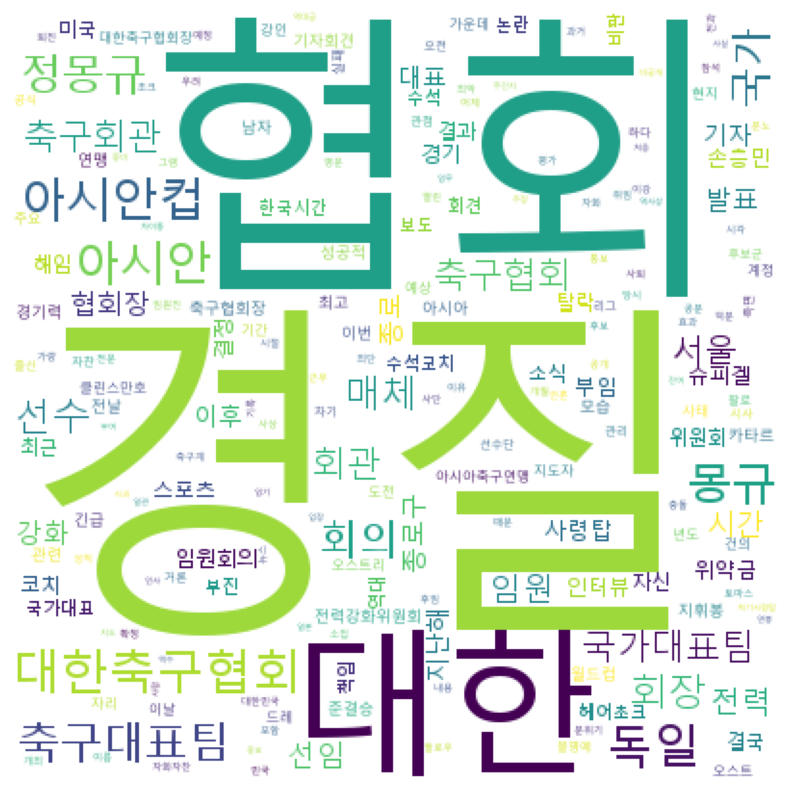

In [25]:
font_path = 'C:/Windows/Fonts/malgun.ttf'

wc = WordCloud(font_path = font_path, random_state = 123,  width = 400,
              height = 400, background_color = 'white')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)
plt.savefig('클린스만_워드클라우드')